In [2]:
import pickle
import matplotlib.pyplot as plt

In [13]:
with open("data/music_unprocessed/x_test.pkl", "rb") as f:
    data = pickle.load(f)

In [14]:
data.shape

(27, 1843200)

In [15]:
sample = data[10].flatten()[:128*30]

In [16]:
sample.shape

(3840,)

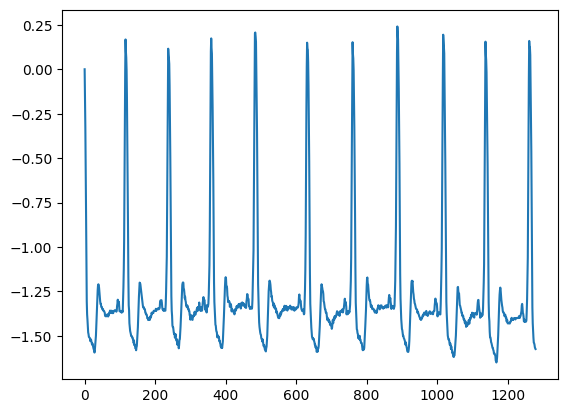

In [17]:
plt.plot(sample[:128*10])

In [39]:
import preprocessing.preprocessing_chagas as pre

sig_lp = pre.low_pass_filter(sample)[0]
sig_hp = pre.high_pass_filter(sig_lp)[0]
sig_pl = pre.powerline_filter(sig_hp)
sig_emg = pre.emg_noise_filter(sig_pl)

In [40]:
sig_emg

array([-0.2698490436084011, -0.3865521443423836, -0.5269293723914312, ...,
       0.09286141024568749, 0.09057281068527791, 0.08157034009413874],
      dtype=object)

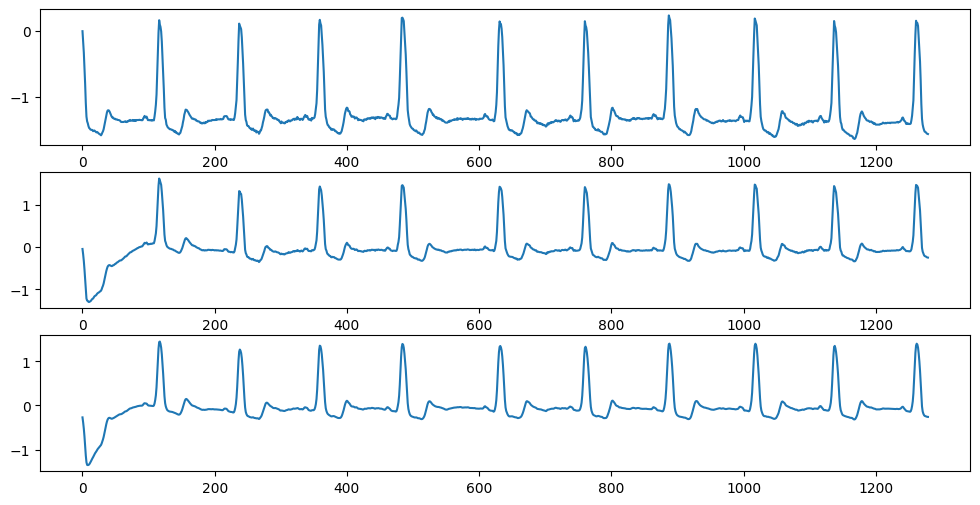

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(12, 6))
axes = axes.flatten()

axes[0].plot(sample[:128*10], label='original')
axes[1].plot(sig_hp[:128*10], label='high pass')
axes[2].plot(sig_emg[:128*10], label='emg')
plt.show()

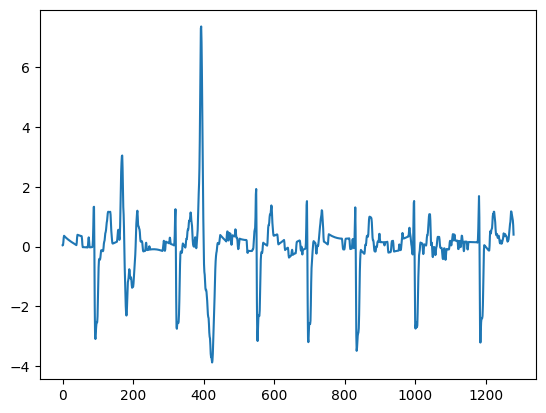

In [22]:
with open("data/music_preprocessed_10s_hotencodeFalse_standard/x_test.pkl", "rb") as f:
    data = pickle.load(f)

sample = data[30].flatten()

plt.plot(sample)